<a href="https://colab.research.google.com/github/sg758253/IDS/blob/main/HW4/problem1_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
# read csv
df  = pd.read_csv("https://raw.githubusercontent.com/sg758253/IDS/main/HW4/adult_training.csv");
df

,age,workclass,education,marital_status,occupation,sex,capital_gain,capital_loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


In [8]:
#checking how many ? is available in dataset 
print("age: ",df.age.isin(['?']).sum())
print("workclass: ",df.workclass.isin(['?']).sum())
print("marital_status: ",df.marital_status.isin(['?']).sum())
print("occupation: ",df.occupation.isin(['?']).sum())
print("sex: ",df.sex.isin(['?']).sum())
print("capital_gain: ",df.capital_gain.isin(['?']).sum())
print("capital_loss: ",df.capital_loss.isin(['?']).sum())
print("income: ",df.income.isin(['?']).sum())

age:  0
workclass:  829
marital_status:  0
occupation:  834
sex:  0
capital_gain:  0
capital_loss:  0
income:  0


in 829 times workclass has "?", while occupation has 834 times "?" which needs to remove/replace 

In [9]:
# printing most common values
print("workclass most common value: ",df.workclass.mode())
print("occupation most common value: ",df.occupation.mode())

workclass most common value:  0    Private
dtype: object
occupation most common value:  0    Prof-specialty
dtype: object


the most common value in feature workclass is "Private" and in feature  occupation is "Prof-specialty".

In [10]:
# replacing ? with most comon values
df['workclass']= df['workclass'].replace('?','Private')
df['occupation']= df['occupation'].replace('?','Prof-specialty')

In [11]:
# check null values
df.isnull().sum()

age               0
workclass         0
education         0
marital_status    0
occupation        0
sex               0
capital_gain      0
capital_loss      0
income            0
dtype: int64

# 2. Create a contingency table of workclass and sex, and plot it.

In [12]:
# contingency table for workclass and sex.
df_ct1 = pd.crosstab(df.workclass, df.sex, margins=True)
df_ct1

sex,Female,Male,All
workclass,,,
Federal-gov,149,305,454
Local-gov,377,592,969
Never-worked,1,4,5
Private,3951,7159,11110
Self-emp-inc,54,444,498
Self-emp-not-inc,178,992,1170
State-gov,201,385,586
Without-pay,1,4,5
All,4912,9885,14797


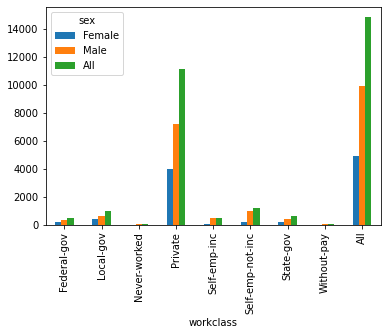

In [13]:
# contingency plot workclass and sex.
df_ct1.plot.bar()

Overall, private sector has most of the workers while male ratio ratio is higher than female ratio.   

# 3.Create a contingency table of sex and marital status, and plot it.

In [14]:
# contingency table of marital status and sex.
df_ct2 = pd.crosstab(df.marital_status, df.sex)
df_ct2

sex,Female,Male
marital_status,,
Divorced,1219,795
Married-AF-spouse,7,4
Married-civ-spouse,761,6010
Married-spouse-absent,95,104
Never-married,2160,2717
Separated,290,182
Widowed,380,73


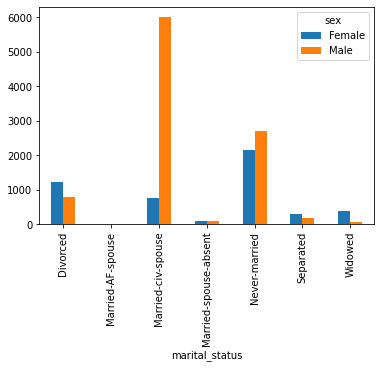

In [15]:
# contingency plot for workclass and sex.
df_ct2.plot.bar()

Married-spouse has the highest number of workers, while male ratio is higher than female.

# 4. Create a new data frame, adultOver40, for those whose age > 40.

In [16]:
# creating new dataframe for age>40
df_adultOver40= df[df['age']>40]
df_adultOver40

,age,workclass,education,marital_status,occupation,sex,capital_gain,capital_loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
8,54,Private,10,Married-civ-spouse,Prof-specialty,Male,0,0,>50K
...,...,...,...,...,...,...,...,...,...
14787,45,Local-gov,12,Divorced,Prof-specialty,Female,0,0,<=50K
14790,65,Self-emp-not-inc,15,Never-married,Prof-specialty,Male,1086,0,<=50K
14791,43,State-gov,10,Divorced,Adm-clerical,Female,0,0,<=50K
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K


# 5. Recreate the contingency table of sex and marital status for adultOver40.

In [17]:
# contingency table of marital status and sex.
df_ct3 = pd.crosstab(df_adultOver40.marital_status, df.sex)
df_ct3

sex,Female,Male
marital_status,,
Divorced,720,448
Married-civ-spouse,305,3383
Married-spouse-absent,38,47
Never-married,256,315
Separated,133,74
Widowed,354,71


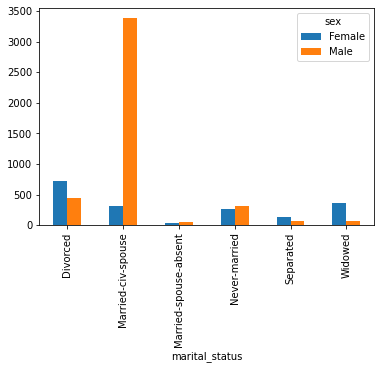

In [18]:
# contingency plot for workclass and sex.
df_ct3.plot.bar()

# 6. Determine whether any outliers exist for the education field. 

In [19]:
df['education'].describe()

count    14797.000000
mean        10.068798
std          2.598297
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


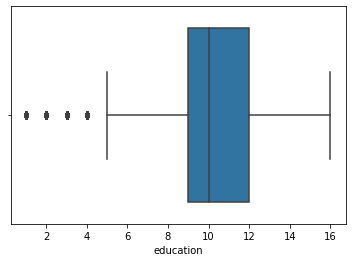

In [20]:
# creating boxplot for education
# plt.boxplot(df['education'])
sns.boxplot(df['education'])

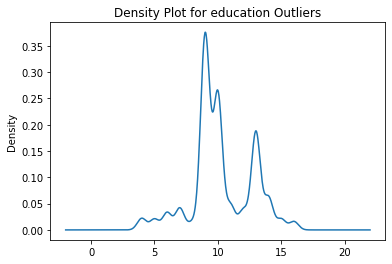

In [22]:
df_edu_outliers = df.query('(education > 3 | education < -3)')['education']
# density plot for distribution of education variable
df_edu_outliers.plot.density()
plt.title('Density Plot for education Outliers')
plt.show()

In [29]:
mean = df.education.mean()
std = df.education.std()
df['education1'] = (df.education-mean)/std
df

,age,workclass,education,marital_status,occupation,sex,capital_gain,capital_loss,income,education1
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,1.128124
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,-0.411346
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,-1.950815
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,-0.411346
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,1.512992
...,...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K,-0.026478
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K,-1.565948
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K,1.512992
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K,-0.411346


In [30]:
q1,q3 = np.percentile(df.education1,[25,75])
IQR = q3-q1
IQR
#lower and upper bound of outliers
lower_bound=q1-(1.5 * IQR)
upper_bound=q3 +(1.5 * IQR)
print('lower_bound',lower_bound)
print('upper_bound',upper_bound)

lower_bound -2.143249232480494
upper_bound 2.475160708068725


In [36]:
df[(df.education1<lower_bound) | (df.education1> upper_bound) ]

,age,workclass,education,marital_status,occupation,sex,capital_gain,capital_loss,income,education1
72,68,Private,2,Divorced,Prof-specialty,Female,0,0,<=50K,-3.105418
96,54,Self-emp-inc,4,Married-civ-spouse,Machine-op-inspct,Male,0,0,>50K,-2.335683
101,53,Local-gov,1,Never-married,Machine-op-inspct,Female,0,0,<=50K,-3.490285
199,52,Private,2,Married-civ-spouse,Machine-op-inspct,Male,0,0,<=50K,-3.105418
234,53,Private,3,Widowed,Prof-specialty,Female,0,0,<=50K,-2.720550
...,...,...,...,...,...,...,...,...,...,...
14723,52,Local-gov,4,Never-married,Other-service,Female,0,0,<=50K,-2.335683
14724,48,Private,2,Married-civ-spouse,Machine-op-inspct,Male,0,0,<=50K,-3.105418
14727,45,Private,3,Married-civ-spouse,Machine-op-inspct,Male,0,0,<=50K,-2.720550
14742,61,Private,4,Married-civ-spouse,Craft-repair,Male,0,0,<=50K,-2.335683


Result shows that there are 552 outliers in dataset. 

# 7. Standardize (zero mean) the age variable, and identify how many outliers there are. What is the most extreme outlier?

In [37]:
df['age'].describe()

count    14797.000000
mean        38.687437
std         13.678875
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


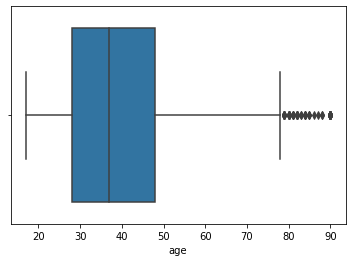

In [38]:
sns.boxplot(df.age)

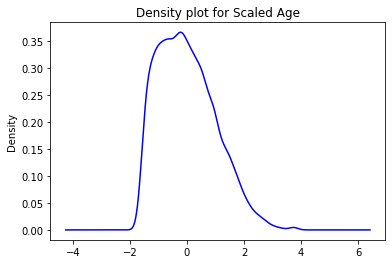

In [39]:
# Standardize (zero mean)
from scipy import stats
df['scaled_age'] = stats.zscore(df.age)
df.scaled_age.plot.density(color="blue")
plt.title('Density plot for Scaled Age')
plt.show()

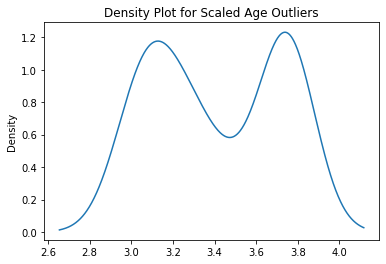

In [ ]:
df_scaled_age_outlier = df.query('(scaled_age > 3 | scaled_age < -3)')['scaled_age']
df_scaled_age_outlier.plot.density()
plt.title('Density Plot for Scaled Age Outliers')
plt.show()

In [40]:
mean = df.education.mean()
std = df.education.std()
df['age1'] = (df.age-mean)/std
df

,age,workclass,education,marital_status,occupation,sex,capital_gain,capital_loss,income,education1,scaled_age,age1
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,1.128124,0.827038,15.368222
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,-0.411346,-0.050257,10.749812
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,-1.950815,0.753930,14.983354
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,-0.411346,0.973254,16.137957
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,1.512992,-0.562012,8.055739
...,...,...,...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K,-0.026478,0.315282,12.674149
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K,-1.565948,-0.488904,8.440607
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K,1.512992,-0.488904,8.440607
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K,-0.411346,1.411901,18.447162


In [44]:
q1,q3 = np.percentile(df.age1,[25,75])
IQR = q3-q1
IQR
#lower and upper bound of outliers
lower_bound=q1-(1.5 * IQR)
upper_bound=q3 +(1.5 * IQR)
print('upper_bound',upper_bound)
df[(df.age1> upper_bound) ]

upper_bound 26.14451165338347


,age,workclass,education,marital_status,occupation,sex,capital_gain,capital_loss,income,education1,scaled_age,age1
30,79,Private,10,Married-civ-spouse,Prof-specialty,Male,0,0,<=50K,-0.026478,2.947167,26.529379
99,90,Private,9,Never-married,Other-service,Male,0,2206,<=50K,-0.411346,3.751354,30.762922
204,80,Private,9,Widowed,Prof-specialty,Male,0,0,<=50K,-0.411346,3.020275,26.914247
492,90,Private,9,Never-married,Other-service,Female,0,0,<=50K,-0.411346,3.751354,30.762922
552,88,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,Male,0,0,<=50K,1.897859,3.605138,29.993187
...,...,...,...,...,...,...,...,...,...,...,...,...
14455,80,Self-emp-not-inc,4,Never-married,Farming-fishing,Male,0,0,<=50K,-2.335683,3.020275,26.914247
14471,82,Self-emp-not-inc,9,Married-civ-spouse,Farming-fishing,Male,0,0,<=50K,-0.411346,3.166491,27.683982
14660,90,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K,-0.411346,3.751354,30.762922
14746,85,Private,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,1.128124,3.385814,28.838584


There are 70 outliers at high end.

# 8. Age anomaly? Select only records with age  at least 80, and construct a histogram of age. Explain what you see.

In [49]:
#creating new dataframe for age>=80
df_adultAbove80 = df[df['age']>=80]
df_adultAbove80.head()

,age,workclass,education,marital_status,occupation,sex,capital_gain,capital_loss,income,education1,scaled_age,age1
99,90,Private,9,Never-married,Other-service,Male,0,2206,<=50K,-0.411346,3.751354,30.762922
204,80,Private,9,Widowed,Prof-specialty,Male,0,0,<=50K,-0.411346,3.020275,26.914247
492,90,Private,9,Never-married,Other-service,Female,0,0,<=50K,-0.411346,3.751354,30.762922
552,88,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,Male,0,0,<=50K,1.897859,3.605138,29.993187
885,90,Private,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,1.128124,3.751354,30.762922


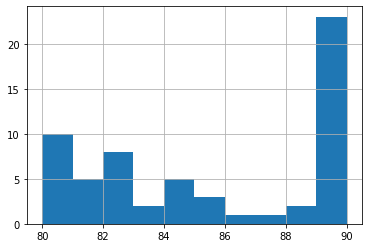

In [50]:
#histogram for age above 80
df_adultAbove80.age.hist()


It seems that there are a number of people lies between 89-90.

**Summary**
1. The initial cross tabulation of workclass and sex revealed that the dataset contains more males than females, and that the vast majority of those sampled work in the private sector.
2. The cross tabulation for marital status and sex revealed that the majority of men are in the Married-Civ-Spouse.
3. There are 552 education outlier present. 
4. There are 70 outliers present at high end of age outlier.
